# Performing Code Archaeology on Deep Dream

The following is a modified version of F. Chollet's implementation of Deep Dream - found at https://keras.io/examples/generative/deep_dream/. The code uses a pretrained image classification model called InceptionV3 for programming Deep Dream which extracts features from images to accentuate them, resulting in a dream-like modification of the original image depicting patterns that seem associated to known concepts in the trained network. For example, a model trained to recognise cats might see cats everywhere!

The first part [Section 1](#-1.-Getting-You-Set-Up) introduces you the first six coding cells with comments to get you started with carrying out **code archaeology** (explained in Week 3). In particular, the comments make clear:

- Lines in the code that represent the three basic operations of coding: importing libraries, printing statements, assigning values to variable by commenting at the start of each code to make these key actions explicit.
- Functions (review the **AI for the Arts and Humanities (B) Work Book** and **Kaggle tutorials referenced therein** if unfamiliar). Some of these come from one of your imported libraries, such as Keras. Some of these are defined in the code using the keyword `def`.

The second and thrid part ([Section 2](#2.-Your-Turn!-Dig-for-Explanations-of-the-Code) and [Section 3](#3.-Concluding-the-Expedition)) are for you to tackle the autopsy yourself. We will build on the list above to help understand the more complex part of the code.


## 1. Getting You Set Up 

In [1]:
###############################
# Importing necessary libraries
###############################

# For working with arrays 
import numpy as np 
#More on arrays - see https://www.kaggle.com/code/hamelg/python-for-data-8-numpy-arrays

# For neural network training and working with tensors:
import tensorflow as tf 
# More on tensors - see https://wandb.ai/vincenttu/intro-to-tensors/reports/A-Gentle-Intro-To-Tensors-With-Examples--VmlldzozMTQ2MjE5

# For building neural networks
import keras
#More on Neural Networks - watch https://www.youtube.com/watch?v=CqOfi41LfDw

# Load pretrained image classification model InceptionV3 
from keras.applications import inception_v3
# More on InceptionV3 - see https://keras.io/api/applications/inceptionv3/

In [2]:
##################################################
# Using variables to tell the computer: 
#     1. where your image is
#     2. where the result should be saved
##################################################

# If your image is at imgur.com, you can use the first command below, replacing the file name and URL 
base_image_path = keras.utils.get_file("sky.jpg", "https://i.imgur.com/aGBdQyK.jpg") #function included with Keras
##### Here we are using the sky.jpg image at https://i.imgur.com/aGBdQyK.jpg

# If you are using a local file, use the command below - comment out the line above and remove the hash tag below.
#base_image_path = "image.jpg" #add your own path to this line instead of image003.jpg
##### Remember you need to provide a valid file path to your own image, instead of image.jpg

# Replace "sky_dream" below with the filename you want for the result. Choose something related to your original image.
result_prefix = "sky_dream" #string data type

127372/127372 [==============================] - 0s 0us/step


In [3]:
# Run the command below to load the model into a variable called "model" - this is called model instantiation.
model=inception_v3.InceptionV3 (weights="imagenet", include_top=False) #function included with Keras
##### The argument weights is set to "ImageNet" to indicate that the model is trained on the dataset at https://image-net.org/ 

87910968/87910968 [==============================] - 3s 0us/step


In [4]:
# For the first summary of the model, run the following command
model.summary() #function included with Keras
# The model is much more complex than models we've seen so far in course (A), but don't be overwhelmed. 
# Scan briefly to see what layer names there are (left column). Note how many total parameters there are (at the end).
# Get Microsoft Copilot (https://copilot.microsoft.com/) to explain the InceptionV3 architecture to you.
# You can include your level of expertise and target audience in the prompt - e.g. complete beginner, general audience.

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

In [5]:
############################################################################################
# The following are the names of the layers for which we are trying to accentuate features.
# We will do this using something called gradient ascent.
# You can tweak these setting to obtain new visual effects.
# For example you can use layer names from the first column of the model summary 
############################################################################################

#names of layers in the InceptionV3 modelwe will focus on
layer_settings = {
    "mixed4": 1.0, 
    "mixed5": 1.5,
    "mixed6": 2.0,
    "mixed7": 2.5,
}

# Playing with the following hyperparameters will also allow you to achieve new effects
step = 0.01  # Gradient ascent step size
num_octave = 3  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales
iterations = 20  # Number of ascent steps per scale
max_loss = 15.0 # as we move away from the original image to accentuate features, we don't want to go too far.


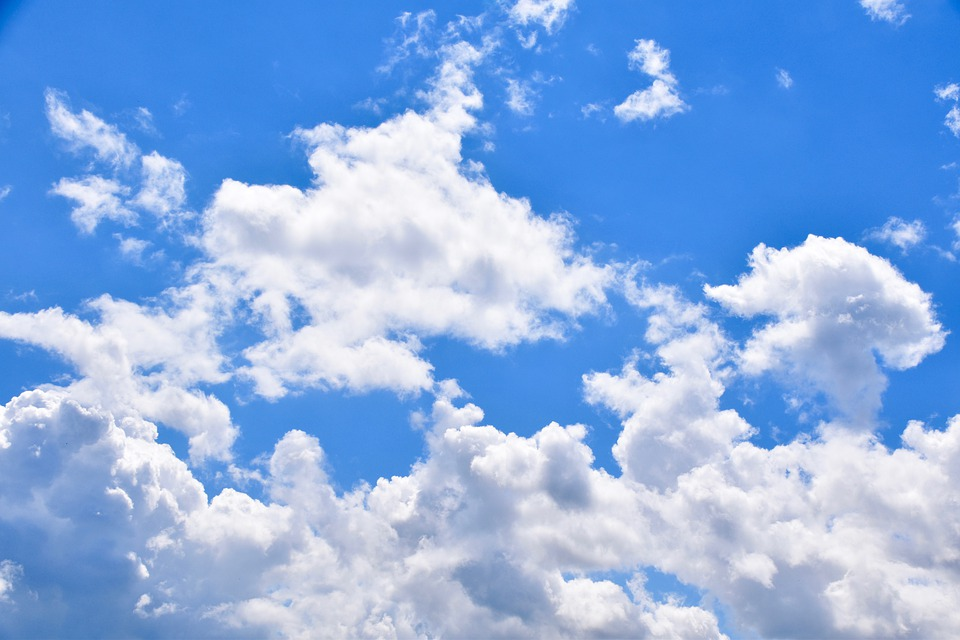

In [6]:
########################################################################################
# Display your base image for inspection.
# This allows you to: 
#     1. Test that your path (given above is correct)
#     2. Examine what your picture looks like before you change it with Deep Dream
#     3. Test that you are able to display images in your notebook
#
########################################################################################

# To do this we import the necessary modules of the Ipython libtrary
from IPython.display import Image, display

#displaying the image for inspection
display(Image(base_image_path))


## 2. Your Turn! Dig for Explanations of the Code 

To repeat from the introduction of this notebook:

- Scan for lines in the code that represent the three basic operations of coding: importing libraries, printing statements, assigning values to variable. 
- Comment at the start of each code to make these key actions explicit.
- Make a note of functions (review the **AI for the Arts and Humanities (B) Work Book** and **Kaggle tutorials referenced therein** if unfamiliar). Some of these come from one of your imported libraries, such as Keras. Some of these are defined in the code using the keyword `def`.

In addition:

- Use AI (e.g. Hugging Chat, Microsoft Copilot, CHatGPT) and snippets from the code and outputs to get more explanation about what each cell is doing or explanations of errors you are getting. Note that you can get different responses from the AI if you:
    1. Break down the code into the snippets to include in your prompt.
    2. Include in your prompt: 
        - Your level of expertise in coding and in AI: e.g. "complete beginner in AI but some familiarity in Python".
        - Who the response should be for: e.g. a general audience, academic audience or for a specific educational background.
        - Requirements for approrpriateness and relevance for audience: e.g. age range of audience. geographical region.
    3. Make your request specific: e.g. instead of general requests to "explain the code to me", you might say "how does the code relate to the steps in the generative AI workflow, for example generating the image".
- Add Markdown Cells to reflect the responses and add deeper explainations of the parts you don't understand.  

In [7]:

def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate arrays.
    img = keras.utils.load_img(image_path)
    img = keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    #img = keras.applications.vgg19.preprocess_input(img)
    img = inception_v3.preprocess_input(img)
    return img

def deprocess_image(x):
    # Util function to convert a NumPy array into a valid image.
    x = x.reshape((x.shape[1], x.shape[2], 3))
    #x = restore_image_from_array(x)
    #x = keras.applications.vgg19.deprocess_input(x)
    # Undo inception v3 preprocessing
    x /= 2.0
    x += 0.5
    x *= 255.0
    # Convert to uint8 and clip to the valid range [0, 255]
    x = np.clip(x, 0, 255).astype("uint8")
    return x


In [8]:
# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict(
    [
        (layer.name, layer.output)
        for layer in [model.get_layer(name) for name in layer_settings.keys()]
    ]
)

# Set up a model that returns the activation values for every target layer
# (as a dict)
feature_extractor = keras.Model(inputs=model.inputs, outputs=outputs_dict)


In [9]:
def compute_loss(input_image):
    features = feature_extractor(input_image)
    # Initialize the loss
    loss = tf.zeros(shape=())
    for name in features.keys():
        coeff = layer_settings[name]
        activation = features[name]
        # We avoid border artifacts by only involving non-border pixels in the loss.
        scaling = tf.reduce_prod(tf.cast(tf.shape(activation), "float32"))
        loss += coeff * tf.reduce_sum(tf.square(activation[:, 2:-2, 2:-2, :])) / scaling 

    return loss


In [10]:
@tf.function
def gradient_ascent_step(img, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads /= tf.maximum(tf.reduce_mean(tf.abs(grads)), 1e-6)
    img += learning_rate * grads
    return loss, img


def gradient_ascent_loop(img, iterations, learning_rate, max_loss=None):
    for i in range(iterations):
        loss, img = gradient_ascent_step(img, learning_rate)
        if max_loss is not None and loss > max_loss:
            break
        print("... Loss value at step %d: %.2f" % (i, loss))
    return img


In [11]:
original_img = preprocess_image(base_image_path)
original_shape = original_img.shape[1:3]

successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale**i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
shrunk_original_img = tf.image.resize(original_img, successive_shapes[0])

img = tf.identity(original_img)  # Make a copy
for i, shape in enumerate(successive_shapes):
    print("Processing octave %d with shape %s" % (i, shape))
    img = tf.image.resize(img, shape)
    img = gradient_ascent_loop(
        img, iterations=iterations, learning_rate=step, max_loss=max_loss
    )
    upscaled_shrunk_original_img = tf.image.resize(shrunk_original_img, shape)
    same_size_original = tf.image.resize(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = tf.image.resize(original_img, shape)

keras.utils.save_img(result_prefix + ".png", deprocess_image(img.numpy()))


Processing octave 0 with shape (326, 489)
... Loss value at step 0: 0.44
... Loss value at step 1: 0.62
... Loss value at step 2: 0.90
... Loss value at step 3: 1.24
... Loss value at step 4: 1.56
... Loss value at step 5: 1.91
... Loss value at step 6: 2.23
... Loss value at step 7: 2.52
... Loss value at step 8: 2.81
... Loss value at step 9: 3.09
... Loss value at step 10: 3.38
... Loss value at step 11: 3.67
... Loss value at step 12: 3.91
... Loss value at step 13: 4.18
... Loss value at step 14: 4.43
... Loss value at step 15: 4.70
... Loss value at step 16: 4.96
... Loss value at step 17: 5.20
... Loss value at step 18: 5.48
... Loss value at step 19: 5.70
Processing octave 1 with shape (457, 685)
... Loss value at step 0: 1.10
... Loss value at step 1: 1.75
... Loss value at step 2: 2.32
... Loss value at step 3: 2.79
... Loss value at step 4: 3.25
... Loss value at step 5: 3.67
... Loss value at step 6: 4.07
... Loss value at step 7: 4.44
... Loss value at step 8: 4.81
... Los

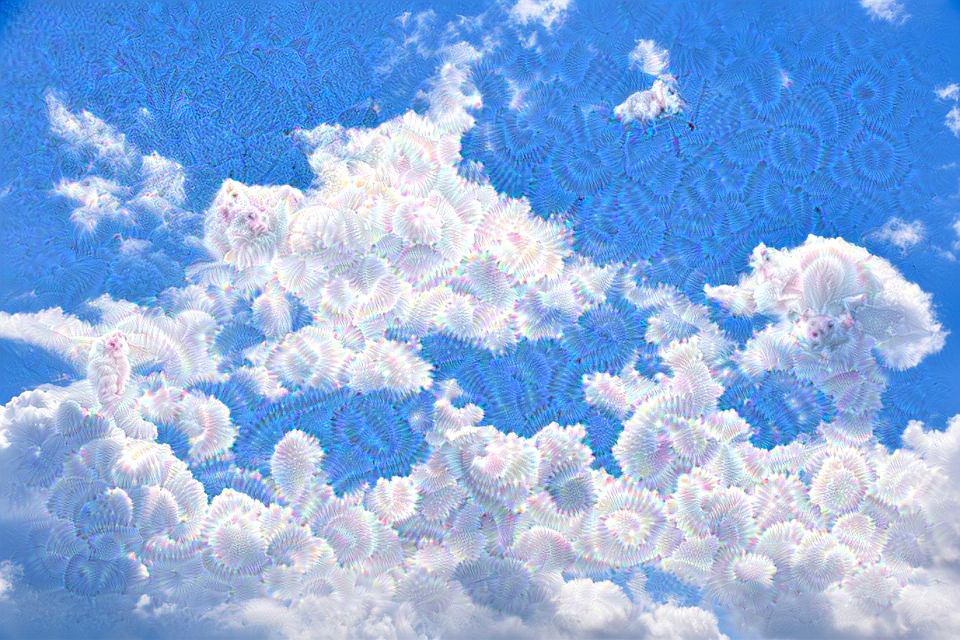

In [12]:
display(Image(result_prefix + ".png"))

## 3. Concluding the Expedition

Now that you have got to the end of the code, ad a mark down cell to reflect on the follow three aspects.
- Consider how you might change the code to apply Deep Dream:
    1. to your own image, 
    2. to use a different model, 
    3. to use different parameters and layers. 
- How can you work with AI tools to generate modified code. And how would you test the code?
- Do you see ways in which you can use or creatively extend the code for your project?
